In [ ]:
# Find the player who played the most sets in a badminton match
import pandas as pd

df = pd.read_csv('Single_Badminton_0108/match_0108.csv', encoding='utf-8')
winner_set_counts = df.groupby('match_winner')['match_set_count'].sum()
loser_set_counts = df.groupby('match_loser')['match_set_count'].sum()
total_set_counts = winner_set_counts.add(loser_set_counts, fill_value=0)
most_sets_player_id = total_set_counts.idxmax()
most_sets_count = total_set_counts.max()

print(f'參加比賽總局數最多的選手ID: {most_sets_player_id}, 出賽局數: {most_sets_count}')


In [ ]:
shot_df = pd.read_csv('./Single_Badminton_0108/shot_0108.csv', encoding='utf-8')
filtered_shot_df = shot_df[shot_df['shot_player'] == most_sets_player_id]
method_1_df = filtered_shot_df[(filtered_shot_df['shot_id'] <= 11372) & (filtered_shot_df['shot_type'] != '未擊球')]
method_2_df = filtered_shot_df[(filtered_shot_df['shot_id'] > 11372) & (filtered_shot_df['shot_type'] != '未擊球')]
method_1_df.to_csv('filtered_shot_1.csv', index=False, encoding='utf-8')
method_2_df.to_csv('filtered_shot_2.csv', index=False, encoding='utf-8')

全連接

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, log_loss
from sklearn.utils import shuffle
from tqdm import tqdm
import joblib

In [ ]:
# 讀取 CSV 文件
df = pd.read_csv('./filtered_shot_2.csv', encoding='utf-8')

# 過濾需要的列
df = df[['shot_hit_area', 'shot_return_area', 'shot_type', 'shot_aroundhead', 'shot_backhand']].dropna()

# 將類別標籤轉換為數字
label_encoder_hit = LabelEncoder()
label_encoder_return = LabelEncoder()
label_encoder_type = LabelEncoder()
df['shot_hit_area_encoded'] = label_encoder_hit.fit_transform(df['shot_hit_area'])
df['shot_return_area_encoded'] = label_encoder_return.fit_transform(df['shot_return_area'])
df['shot_type_encoded'] = label_encoder_type.fit_transform(df['shot_type'])

# 定義特徵和標籤
X = df[['shot_hit_area_encoded', 'shot_type_encoded', 'shot_aroundhead', 'shot_backhand']]
y = df['shot_return_area_encoded']

# 對數據進行shuffle
X, y = shuffle(X, y, random_state=42)

# 分割數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model_params = {
    'activation': 'tanh',
    'alpha': 0.0001,
    'hidden_layer_sizes': (64, 64, 64, 64),
    'learning_rate': 'constant',
    'solver': 'adam'
}

# 使用最优参数初始化模型
model = MLPClassifier(**best_model_params, max_iter=1, warm_start=True, random_state=42)

In [ ]:
# 记录训练和测试数据的损失和准确率
training_losses = []
testing_losses = []
training_accuracies = []
testing_accuracies = []

# 用于保存最佳模型
best_test_acc = 0.0

# 训练模型并记录损失和准确率
for i in range(1, 501):
    # 训练模型
    model.fit(X_train, y_train)

    # 计算训练损失和准确率
    train_loss = model.loss_curve_[-1]  # 使用模型的损失曲线
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    training_losses.append(train_loss)
    training_accuracies.append(train_acc)

    # 计算测试损失和准确率
    y_test_pred = model.predict(X_test)
    test_loss = model.loss_curve_[-1]
    test_acc = accuracy_score(y_test, y_test_pred)
    testing_losses.append(test_loss)
    testing_accuracies.append(test_acc)

    print(f"[{i:03d}/500] Train Acc: {train_acc:.6f} Loss: {train_loss:.6f} | Val Acc: {test_acc:.6f} loss: {test_loss:.6f}")
    if test_acc > best_test_acc:
        best_test_acc = test_acc
        print(f"saving model with acc {test_acc:.3f}")
        joblib.dump(model, 'best_model.pkl')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


[001/500] Train Acc: 0.168895 Loss: 2.364307 | Val Acc: 0.162857 loss: 2.364307
saving model with acc 0.163
[002/500] Train Acc: 0.249005 Loss: 2.250376 | Val Acc: 0.246531 loss: 2.250376
saving model with acc 0.247
[003/500] Train Acc: 0.295234 Loss: 2.182224 | Val Acc: 0.294286 loss: 2.182224
saving model with acc 0.294
[004/500] Train Acc: 0.287070 Loss: 2.091251 | Val Acc: 0.287755 loss: 2.091251
[005/500] Train Acc: 0.293703 Loss: 2.021161 | Val Acc: 0.293878 loss: 2.021161
[006/500] Train Acc: 0.300439 Loss: 1.982748 | Val Acc: 0.299592 loss: 1.982748
saving model with acc 0.300
[007/500] Train Acc: 0.293499 Loss: 1.955125 | Val Acc: 0.291020 loss: 1.955125
[008/500] Train Acc: 0.309317 Loss: 1.925930 | Val Acc: 0.308163 loss: 1.925930
saving model with acc 0.308
[009/500] Train Acc: 0.305031 Loss: 1.915801 | Val Acc: 0.302857 loss: 1.915801
[010/500] Train Acc: 0.306664 Loss: 1.906369 | Val Acc: 0.303673 loss: 1.906369
[011/500] Train Acc: 0.320033 Loss: 1.899866 | Val Acc: 0.31

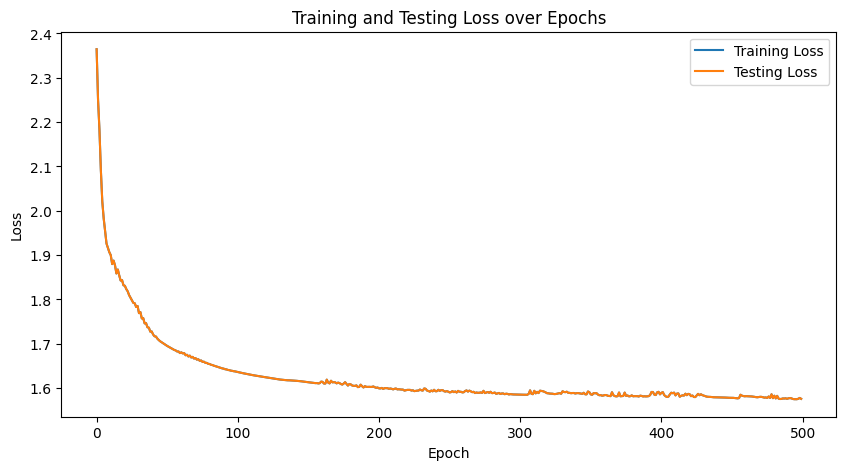

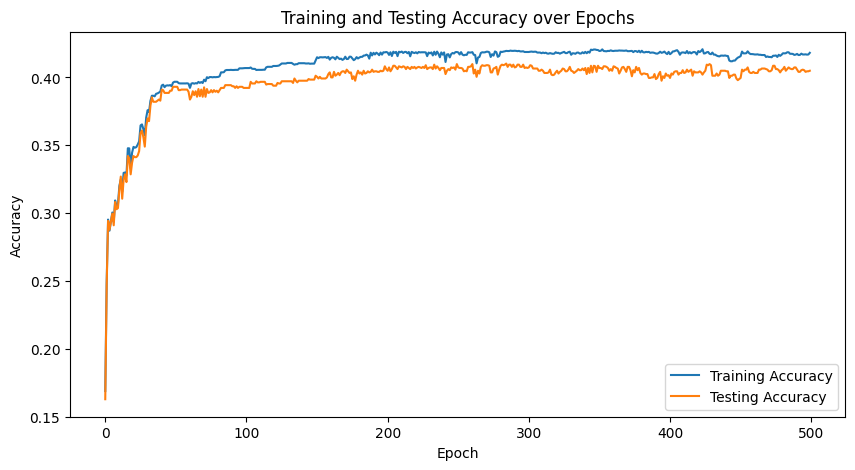

In [ ]:
# 绘制训练和测试数据的损失曲线
plt.figure(figsize=(10, 5))
plt.plot(training_losses, label='Training Loss')
plt.plot(testing_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss over Epochs')
plt.legend()
plt.show()

# 绘制训练和测试数据的准确率曲线
plt.figure(figsize=(10, 5))
plt.plot(training_accuracies, label='Training Accuracy')
plt.plot(testing_accuracies, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over Epochs')
plt.legend()
plt.show()




In [ ]:
# load best model
best_model = joblib.load('best_model.pkl')
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

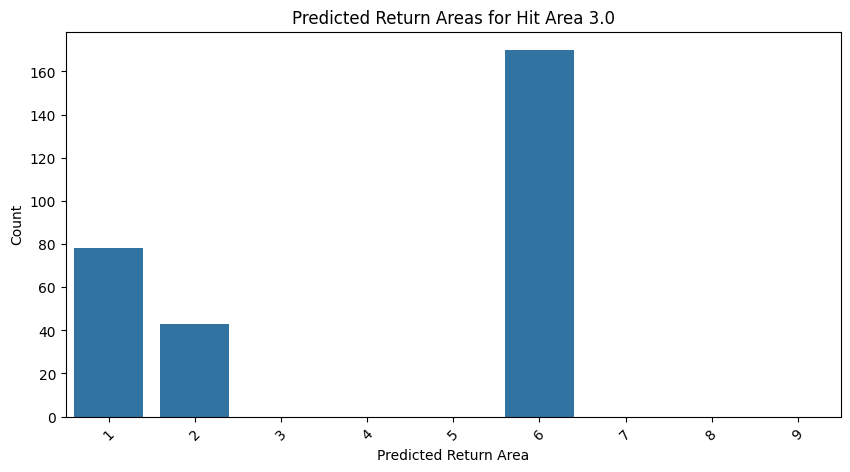

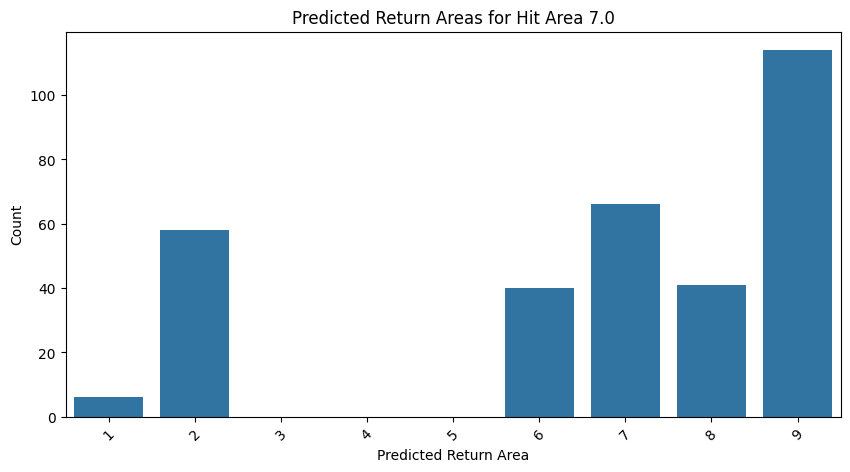

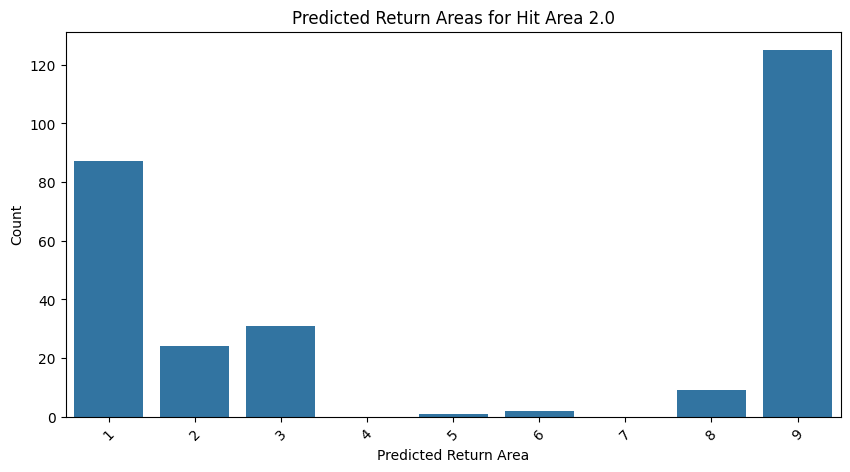

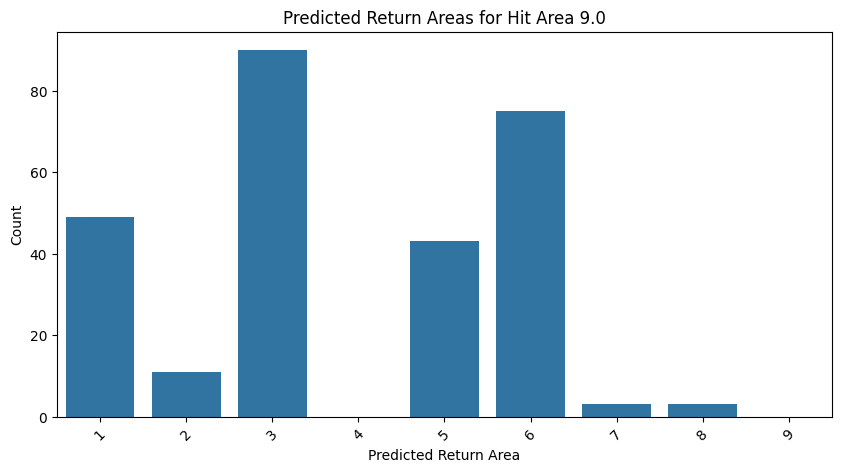

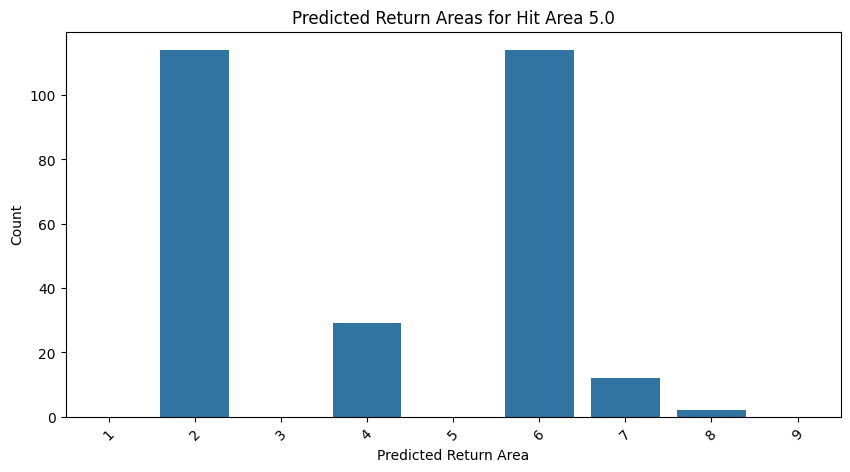

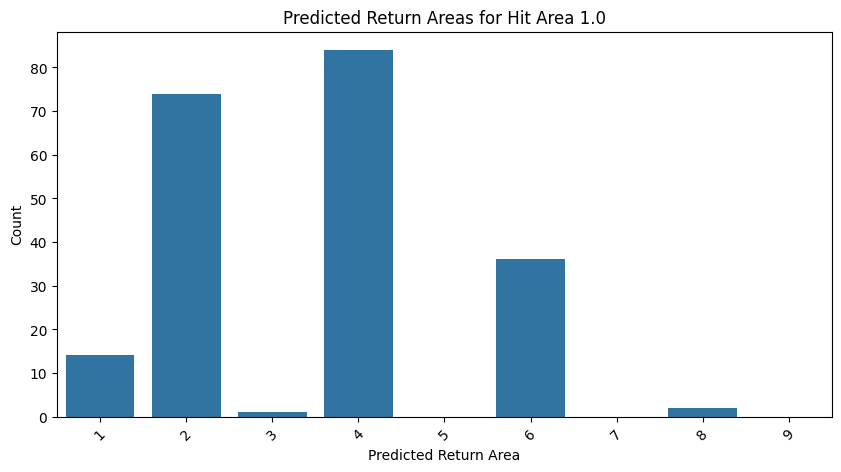

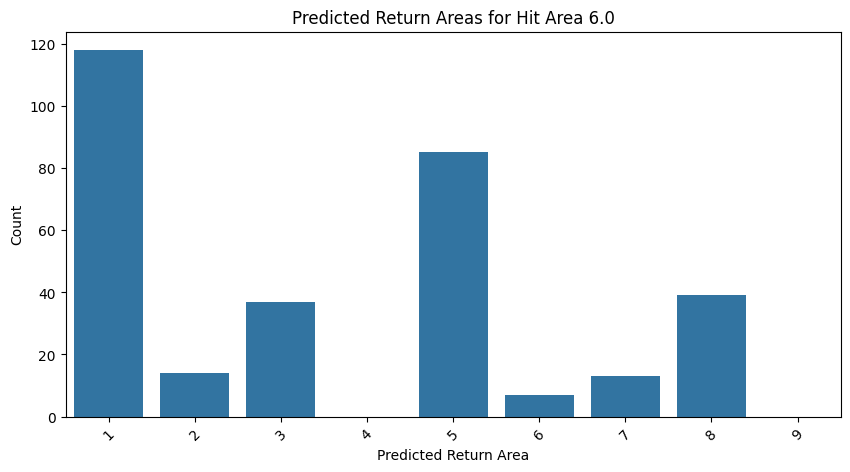

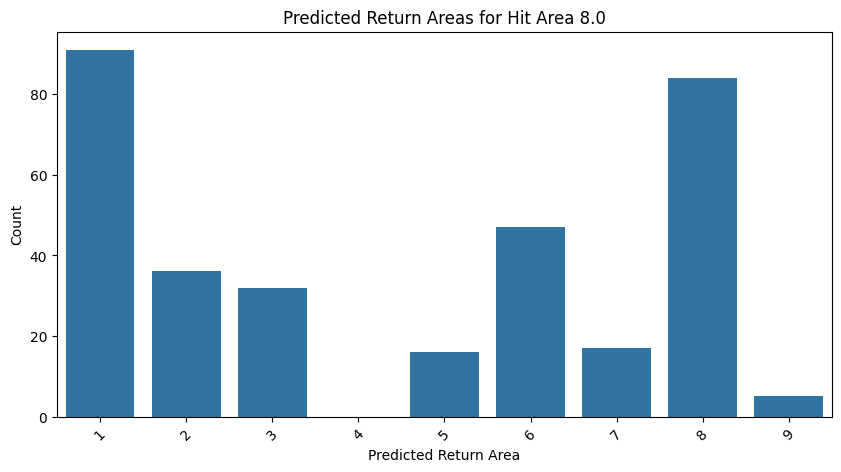

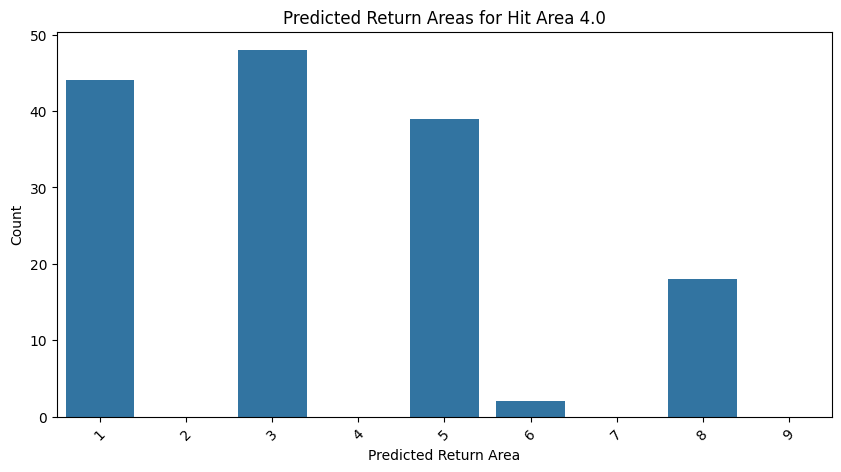

In [ ]:
# 确保所有 predicted_return_area 的值都在 1 到 9 之间，不管 count 是不是 0
all_areas = list(range(1, 10))

# 创建一个字典来存储每个 shot_hit_area 的预测结果
predicted_areas_by_hit_area = {}

# 遍历每个不同的 shot_hit_area，并且只处理 hit_area >= 9 的区域
for hit_area in result_df['hit_area'].unique():
    if int(hit_area) <= 9:
        subset = result_df[result_df['hit_area'] == hit_area]
        predicted_counts = subset['predicted_return_area'].value_counts().reindex(all_areas, fill_value=0)
        predicted_areas_by_hit_area[hit_area] = predicted_counts

# 绘制每个 shot_hit_area 的预测结果
for hit_area, predicted_counts in predicted_areas_by_hit_area.items():
    plt.figure(figsize=(10, 5))
    sns.barplot(x=predicted_counts.index, y=predicted_counts.values)
    plt.xlabel('Predicted Return Area')
    plt.ylabel('Count')
    plt.title(f'Predicted Return Areas for Hit Area {hit_area}')
    plt.xticks(rotation=45)
    plt.show()
